In [1]:
!mkdir -p ithaca/dataset/ && cd ithaca/dataset/ && wget http://www.assael.gr/projects/ithaca/phiml.json

--2020-06-30 15:21:12--  http://www.assael.gr/projects/ithaca/phiml.json
Resolving www.assael.gr (www.assael.gr)... 172.67.142.77, 104.24.107.71, 104.24.106.71, ...
Connecting to www.assael.gr (www.assael.gr)|172.67.142.77|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/json]
Saving to: ‘phiml.json’

phiml.json              [   <=>              ] 133.77M  18.3MB/s    in 7.5s    

2020-06-30 15:21:20 (17.8 MB/s) - ‘phiml.json’ saved [140264164]



In [2]:
import json
import pprint

In [3]:
with open('ithaca/dataset/phiml.json', 'r') as f:
  dataset = json.load(f)

In [4]:
for data_i, data in enumerate(dataset):
  pprint.pprint(data)
  if data_i == 5:
    break

{'date_str': ' 170-116 BC ',
 'id': 228248,
 'metadata': 'Eg. — Kanopos (Abu Qīr) — 170-116 BC — SB 3.6256',
 'region_main': 'Egypt, Nubia and Cyrenaïca',
 'region_main_id': '9',
 'region_sub': 'Egypt and Nubia',
 'region_sub_id': '1497',
 'text': 'υπερ βασιλεως πτολεμαιου και βασιλισσης κλεοπατρας θεων ευεργετων '
         'μητρι θεων ευαντητωι πτολεμαιος και ηρακλειδης οι πτολεμαιου υιοι '
         'ευχην.'}
{'date_str': '',
 'id': 41962,
 'metadata': 'Phokis — Ambryssos — beg. 3rd c. AD',
 'region_main': 'Central Greece (IG VII-IX)',
 'region_main_id': '11',
 'region_sub': 'Phokis, Lokris, Aitolia, Akarnania, and Ionian Islands (IG '
               'IX,1) ',
 'region_sub_id': '1703',
 'text': '[---]νεος επ[ι] της αρχης αυρ αυξιβ[ιο]υ του αντερωτος 0 υ[π]ο '
         'επιμελητας αυρ νικοδωρον αγαθοκλεα κα[λ]λιτυχον.'}
{'date_str': ' 4th c. BC ',
 'id': 309254,
 'metadata': 'Att. — Rhamnous — 4th c. BC — PAE 1977[1980].A.18 — SEG 30.214',
 'region_main': 'Attica (IG I-III)',
 'region_

In [5]:
print(data)

{'id': 41960, 'text': 'αυτοκρατορα καισαρα μαρκον αυρηλιον κομοδον αντωνεινον αυτοκρατορος καισαρος λου σεπτιμιου σερουηρου περτινακος σεβαστου αραβικου αδιαβηνικου παρθικου μεγιστου αδελφον η πολις αμβρωσσεων επι της αρχης αντερωτος του αντερωτος και ευτυχεστατου το[υ] ζηθου επιμεληθεντος του αρχοντος αν[τε]ρωτος. ψ βουλης.', 'metadata': 'Phokis — Ambryssos — 198-209 AD', 'region_main_id': '11', 'region_main': 'Central Greece (IG VII-IX)', 'region_sub_id': '1703', 'region_sub': 'Phokis, Lokris, Aitolia, Akarnania, and Ionian Islands (IG IX,1) ', 'date_str': ''}


In [6]:
#making a list that contains the dataset
list_data=[]
for data_i, data in enumerate(dataset):
  list_data.append(data)
  

In [7]:
len(list_data)

56688

In [8]:
import pandas as pd

# make a dict to feed the panda
records = {"text":[], "region":[], "subregion":[], "region_id":[], "subregion_id":[]}
for instance in dataset:
  records["text"].append(instance["text"])
  records["region"].append(instance["region_main"])
  records["subregion"].append(instance["region_sub"])
  records["region_id"].append(instance["region_main_id"])
  records["subregion_id"].append(instance["region_sub_id"])

epigraphs_pd = pd.DataFrame(records)

In [9]:
epigraphs_pd

,text,region,subregion,region_id,subregion_id
0,υπερ βασιλεως πτολεμαιου και βασιλισσης κλεοπα...,"Egypt, Nubia and Cyrenaïca",Egypt and Nubia,9,1497
1,[---]νεος επ[ι] της αρχης αυρ αυξιβ[ιο]υ του α...,Central Greece (IG VII-IX),"Phokis, Lokris, Aitolia, Akarnania, and Ionian...",11,1703
2,θεομνηστος πρωταρχο ραμνουσιος κλεαγορα θεοδημ...,Attica (IG I-III),Rhamnous,7,396
3,τον μεγιστον και θει[ο]τατον αυτοκρατορα μαρκο...,Central Greece (IG VII-IX),"Phokis, Lokris, Aitolia, Akarnania, and Ionian...",11,1703
4,βασιλευς πτολεμαιος πτολεμαιου και αρσινοης θε...,"Egypt, Nubia and Cyrenaïca",Egypt and Nubia,9,1497
...,...,...,...,...,...
56683,[---------------------] [---------- την δε εν ...,Attica (IG I-III),Attica,7,1365
56684,[--------]ες[------ εις δε την αναγραφην τη]ς ...,Attica (IG I-III),Attica,7,1365
56685,[-------------------] [----- τον δε γρα]μ[ματε...,Attica (IG I-III),Attica,7,1365
56686,[------------------] [--------]ες[----- εις δε...,Attica (IG I-III),Attica,7,1365


In [10]:
asia_minor = epigraphs_pd[epigraphs_pd.subregion=="Asia Minor"]
attica= epigraphs_pd[epigraphs_pd.subregion=="Attica(IG I-III)"]
aegean_crete=epigraphs_pd[epigraphs_pd.subregion=="Aegean Islands, incl. Crete(IG XI-[XIII])"]
central_greece=epigraphs_pd[epigraphs_pd.subregion=="Central Greece (IG VII-IX)"]
#other=epigraphs_pd[epigraphs_pd.subregion=!"Asia Minor","Attica(IG I-III)","Aegean Islands, incl. Crete(IG XI-[XIII])","Central Greece (IG VII-IX)"]
#"Egypt or Nubia and Cyrenaica","Nothern Greece (IG X)", "Greater Syria and the East", "Thrace and the Lower Danube(IG X)",]
#"Peloponnesos (IG XI-[XIII])"or "North Shore of the Black Sea"or "Cyprus([IG XVI])"or "Sicily,Italy, and the West (IG XIV)"or"Upper Danube"or"North Africa"]

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


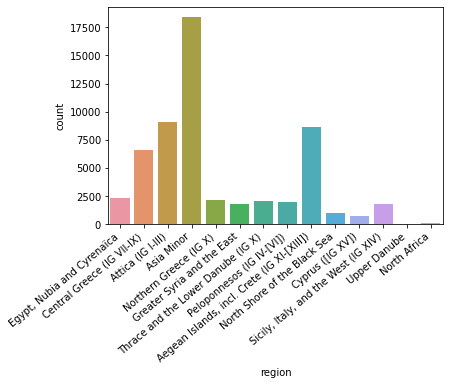

In [11]:
import seaborn as sns
ax = sns.countplot(x="region", data=epigraphs_pd)
_ = ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

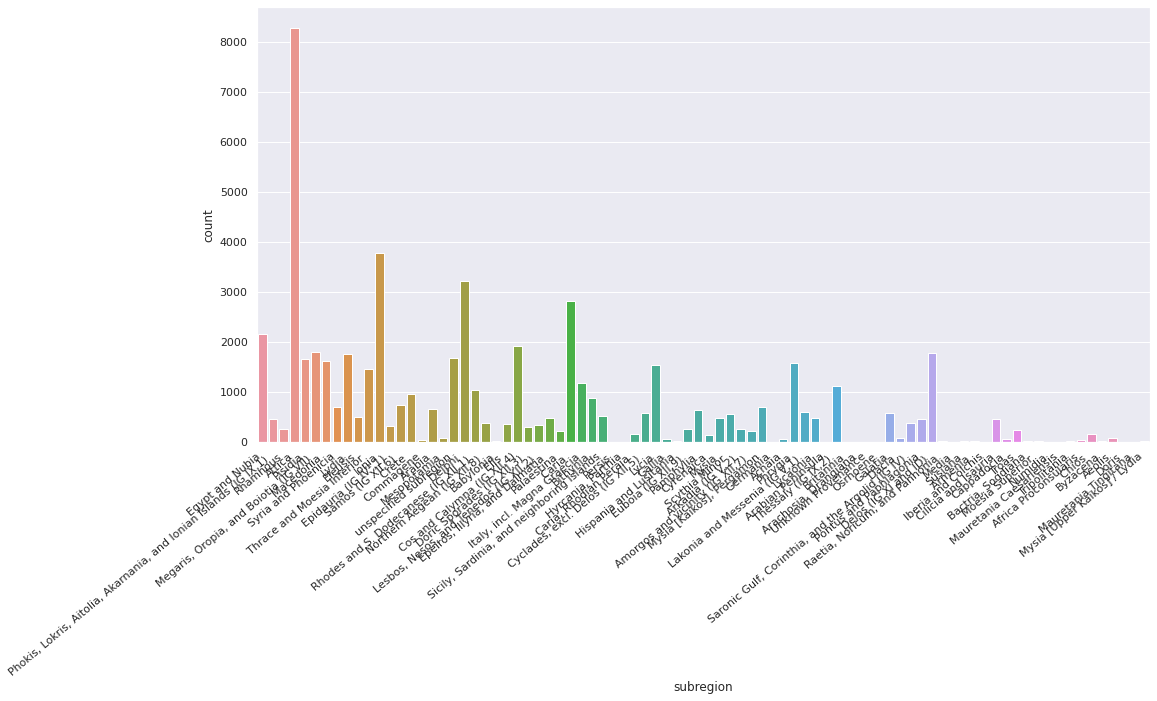

In [12]:
sns.set(rc={'figure.figsize':(16, 8)})
ax = sns.countplot(x="subregion", data=epigraphs_pd)
_ = ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

In [13]:
print(len(list_data))

56688


In [14]:
#making a list with all the main regions
main = []
for item in list_data:
    main.append(item['region_main'])

In [15]:
print(main)

['Egypt, Nubia and Cyrenaïca', 'Central Greece (IG VII-IX)', 'Attica (IG I-III)', 'Central Greece (IG VII-IX)', 'Egypt, Nubia and Cyrenaïca', 'Central Greece (IG VII-IX)', 'Egypt, Nubia and Cyrenaïca', 'Attica (IG I-III)', 'Egypt, Nubia and Cyrenaïca', 'Attica (IG I-III)', 'Attica (IG I-III)', 'Asia Minor', 'Egypt, Nubia and Cyrenaïca', 'Central Greece (IG VII-IX)', 'Asia Minor', 'Central Greece (IG VII-IX)', 'Central Greece (IG VII-IX)', 'Egypt, Nubia and Cyrenaïca', 'Asia Minor', 'Egypt, Nubia and Cyrenaïca', 'Central Greece (IG VII-IX)', 'Egypt, Nubia and Cyrenaïca', 'Central Greece (IG VII-IX)', 'Egypt, Nubia and Cyrenaïca', 'Central Greece (IG VII-IX)', 'Central Greece (IG VII-IX)', 'Asia Minor', 'Central Greece (IG VII-IX)', 'Asia Minor', 'Central Greece (IG VII-IX)', 'Central Greece (IG VII-IX)', 'Asia Minor', 'Attica (IG I-III)', 'Central Greece (IG VII-IX)', 'Central Greece (IG VII-IX)', 'Northern Greece (IG X)', 'Asia Minor', 'Northern Greece (IG X)', 'Central Greece (IG VII-

In [16]:
#count the frequence of every main-region (from most to least common)
from collections import Counter
lexicon=dict(Counter(main).most_common())
print(lexicon)

{'Asia Minor': 18428, 'Attica (IG I-III)': 9052, 'Aegean Islands, incl. Crete (IG XI-[XIII])': 8674, 'Central Greece (IG VII-IX)': 6614, 'Egypt, Nubia and Cyrenaïca': 2308, 'Northern Greece (IG X)': 2110, 'Thrace and the Lower Danube (IG X)': 2084, 'Peloponnesos (IG IV-[VI])': 1985, 'Greater Syria and the East': 1819, 'Sicily, Italy, and the West (IG XIV)': 1805, 'North Shore of the Black Sea': 977, 'Cyprus ([IG XV])': 708, 'North Africa': 81, 'Upper Danube': 43}


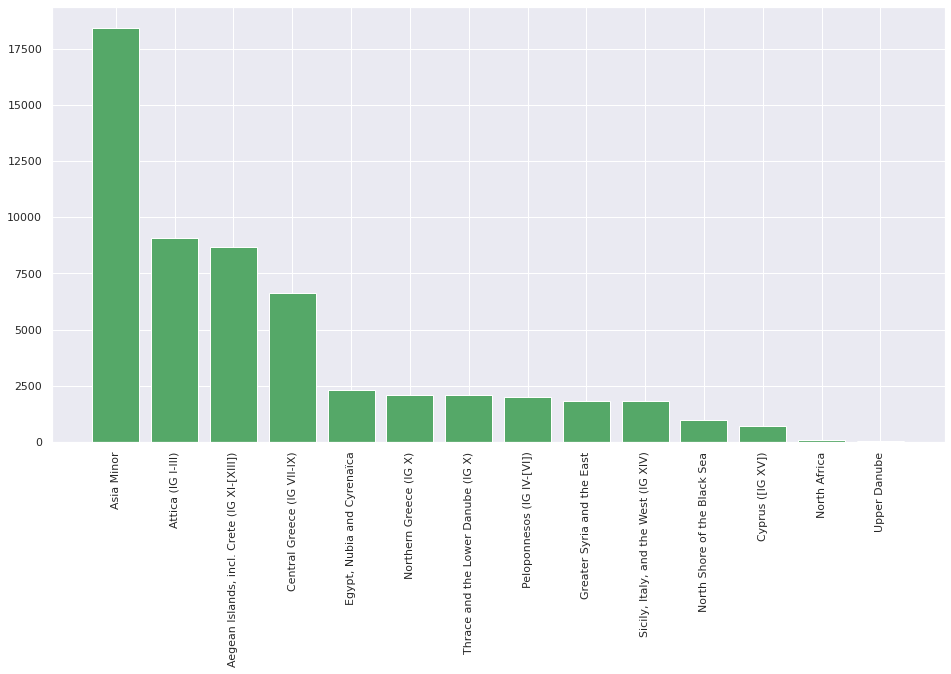

In [17]:
import matplotlib.pyplot as plt
plt.bar((lexicon.keys()), lexicon.values(), color='g')
plt.xticks(rotation=90)
plt.show()


In [18]:
#making a list with all the sub regions
sub = []
for item in list_data:
    sub.append(item['region_sub'])

In [19]:
print(sub)

['Egypt and Nubia', 'Phokis, Lokris, Aitolia, Akarnania, and Ionian Islands (IG IX,1) ', 'Rhamnous', 'Phokis, Lokris, Aitolia, Akarnania, and Ionian Islands (IG IX,1) ', 'Egypt and Nubia', 'Phokis, Lokris, Aitolia, Akarnania, and Ionian Islands (IG IX,1) ', 'Egypt and Nubia', 'Attica', 'Egypt and Nubia', 'Rhamnous', 'Rhamnous', 'Pisidia', 'Egypt and Nubia', 'Phokis, Lokris, Aitolia, Akarnania, and Ionian Islands (IG IX,1) ', 'Pisidia', 'Phokis, Lokris, Aitolia, Akarnania, and Ionian Islands (IG IX,1) ', 'Phokis, Lokris, Aitolia, Akarnania, and Ionian Islands (IG IX,1) ', 'Egypt and Nubia', 'Pisidia', 'Egypt and Nubia', 'Phokis, Lokris, Aitolia, Akarnania, and Ionian Islands (IG IX,1) ', 'Egypt and Nubia', 'Phokis, Lokris, Aitolia, Akarnania, and Ionian Islands (IG IX,1) ', 'Egypt and Nubia', 'Phokis, Lokris, Aitolia, Akarnania, and Ionian Islands (IG IX,1) ', 'Phokis, Lokris, Aitolia, Akarnania, and Ionian Islands (IG IX,1) ', 'Pisidia', 'Phokis, Lokris, Aitolia, Akarnania, and Ionian 

In [20]:
#count the frequence of every sub-region (from most to least common)
lexicon2=dict(Counter(sub).most_common())
print(lexicon2)

{'Attica': 8288, 'Ionia': 3772, 'Delphi ': 3224, 'Caria ': 2826, 'Egypt and Nubia': 2170, 'Cos and Calymna (IG XII,4)': 1920, 'Megaris, Oropia, and Boiotia (IG VII) ': 1796, 'Delos (IG XI and ID) ': 1783, 'Lydia': 1766, 'unspecified subregion': 1688, 'Pisidia': 1656, 'Macedonia ': 1624, 'Phrygia': 1587, 'Lycia': 1540, 'Thrace and Moesia Inferior ': 1452, 'Italy, incl. Magna Graecia': 1183, 'Thessaly (IG IX,2) ': 1124, 'Rhodes and S. Dodecanese (IG XII,1) ': 1049, 'Crete ': 958, 'Bithynia': 879, 'Samos (IG XII,6) ': 737, 'Syria and Phoenicia': 705, 'Mysia [Kaïkos], Pergamon': 705, 'Arabia': 655, 'Pamphylia': 643, 'Lakonia and Messenia (IG V,1) ': 608, 'Galatia': 580, 'Cyclades, excl. Delos (IG XII,5) ': 576, 'Scythia Minor ': 555, 'Sicily, Sardinia, and neighboring Islands': 528, 'Eleusis': 499, 'Epeiros, Illyria, and Dalmatia ': 486, 'Lycaonia': 485, 'Mysia': 474, 'Phokis, Lokris, Aitolia, Akarnania, and Ionian Islands (IG IX,1) ': 466, 'Cilicia and Isauria': 464, 'Pontus and Paphlagon

In [21]:
print(len(lexicon2))

84


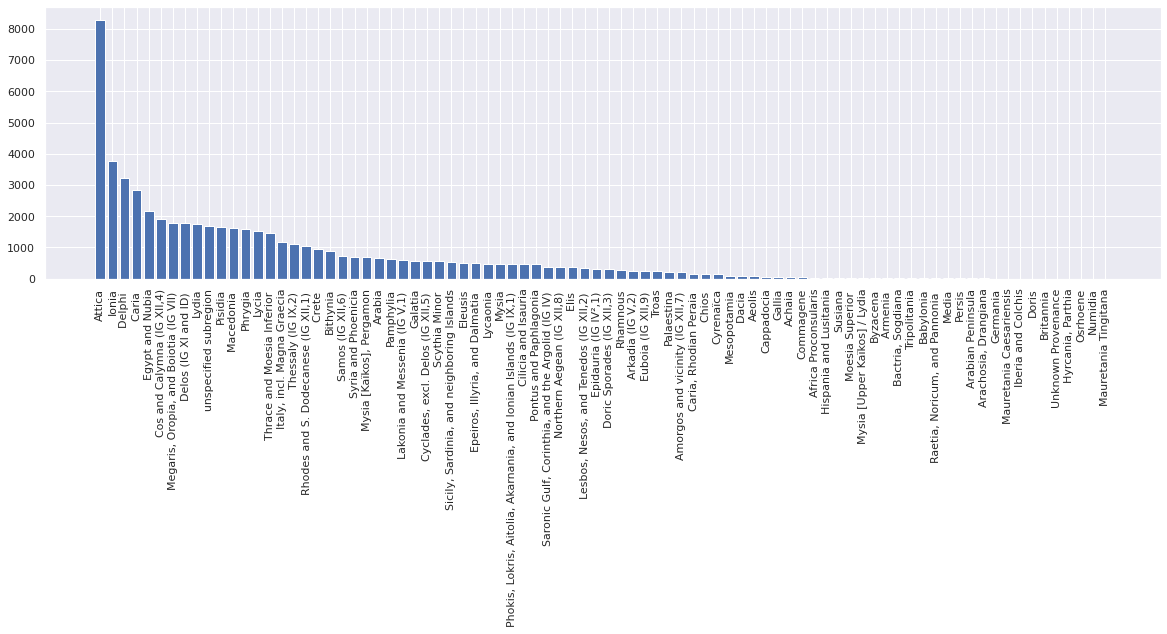

In [22]:
fig, ax = plt.subplots(figsize=(20, 5))

ax.bar(lexicon2.keys(), 
       lexicon2.values())

plt.xticks(rotation=90)
plt.show()

In [23]:
#making a list with all the dates
date = []
for item in list_data:
    date.append(item['date_str'])

In [24]:
date[:10]

[' 170-116 BC ',
 '',
 ' 4th c. BC ',
 '',
 ' 247-221 BC ',
 '',
 '',
 '',
 ' 247-221 BC ',
 ' 2nd half 4th c. BC ']

In [25]:
print(len(date))

56688


In [26]:
#count how many haven't a date
cnt=0
for i in range(len(date)):        

  if(date[i]==""):     
    
    cnt+=1
print(cnt)   

36307


In [27]:
#and how many have a date
cnt2=0
for i in range(len(date)):         
                                 
  if(date[i]!=""):    
                     
    cnt2+=1
print(cnt2) 

20381


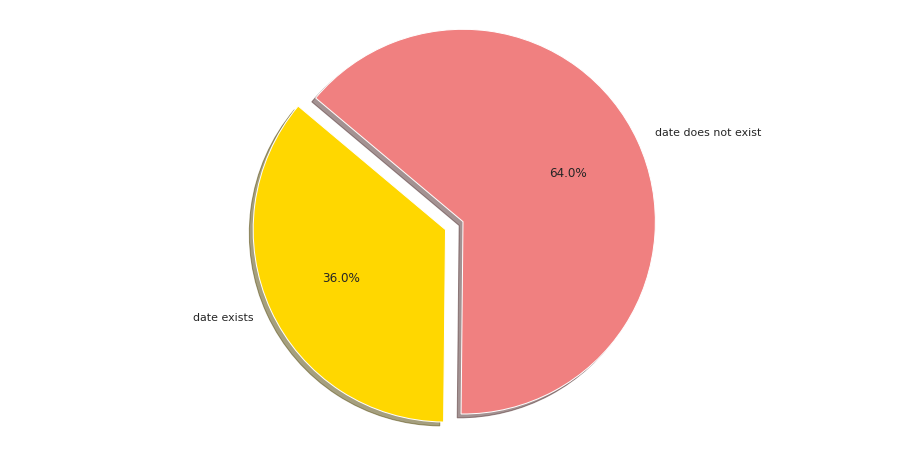

In [28]:
import matplotlib.pyplot as plt

# Data to plot
labels = 'date exists', 'date does not exist'
sizes = [20381, 36307]
colors = ['gold', 'lightcoral']
explode = (0.1,0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

In [29]:
text = []
for item in list_data:
    text.append(item['text'])
text[:10]    

['υπερ βασιλεως πτολεμαιου και βασιλισσης κλεοπατρας θεων ευεργετων μητρι θεων ευαντητωι πτολεμαιος και ηρακλειδης οι πτολεμαιου υιοι ευχην.',
 '[---]νεος επ[ι] της αρχης αυρ αυξιβ[ιο]υ του αντερωτος 0 υ[π]ο επιμελητας αυρ νικοδωρον αγαθοκλεα κα[λ]λιτυχον.',
 'θεομνηστος πρωταρχο ραμνουσιος κλεαγορα θεοδημος θεομνηστου ραμνουσιος θειοφανης θεοφαντου ραμνουσιος.',
 'τον μεγιστον και θει[ο]τατον αυτοκρατορα μαρκον αυρηλιον σεουηρον αλεξανδρον [ευσεβη] ευτυχ[η σεβαστον ---].',
 'βασιλευς πτολεμαιος πτολεμαιου και αρσινοης θεων αδελφων και βασιλισσα βερενικη η αδελφη και γυνη αυτου το τεμενος οσιρει.',
 'αυτοκρατορα καισαρα μαρκον αυρηλιον κομοδον αντωνεινον αυτοκρατορος καισαρος λου σεπτιμιου σερουηρου περτινακος σεβαστου αραβικου αδιαβηνικου παρθικου μεγιστου αδελφον η πολις αμβρωσσεων επι της αρχης αντερωτος του αντερωτος και ευτυχεστατου το[υ] ζηθου επιμεληθεντος του αρχοντος αν[τε]ρωτος. ψ βουλης.',
 'σαραπιδι ισιδι νειλωι και βασιλει πτολεμαιωι και βασιλισσηι βερενικηι θεοις ευεργετα

In [30]:
print(len(text))

56688


In [31]:
words=[]
for line in text:
  words.append(line.split())
 

In [32]:
print(words[:10])

[['υπερ', 'βασιλεως', 'πτολεμαιου', 'και', 'βασιλισσης', 'κλεοπατρας', 'θεων', 'ευεργετων', 'μητρι', 'θεων', 'ευαντητωι', 'πτολεμαιος', 'και', 'ηρακλειδης', 'οι', 'πτολεμαιου', 'υιοι', 'ευχην.'], ['[---]νεος', 'επ[ι]', 'της', 'αρχης', 'αυρ', 'αυξιβ[ιο]υ', 'του', 'αντερωτος', '0', 'υ[π]ο', 'επιμελητας', 'αυρ', 'νικοδωρον', 'αγαθοκλεα', 'κα[λ]λιτυχον.'], ['θεομνηστος', 'πρωταρχο', 'ραμνουσιος', 'κλεαγορα', 'θεοδημος', 'θεομνηστου', 'ραμνουσιος', 'θειοφανης', 'θεοφαντου', 'ραμνουσιος.'], ['τον', 'μεγιστον', 'και', 'θει[ο]τατον', 'αυτοκρατορα', 'μαρκον', 'αυρηλιον', 'σεουηρον', 'αλεξανδρον', '[ευσεβη]', 'ευτυχ[η', 'σεβαστον', '---].'], ['βασιλευς', 'πτολεμαιος', 'πτολεμαιου', 'και', 'αρσινοης', 'θεων', 'αδελφων', 'και', 'βασιλισσα', 'βερενικη', 'η', 'αδελφη', 'και', 'γυνη', 'αυτου', 'το', 'τεμενος', 'οσιρει.'], ['αυτοκρατορα', 'καισαρα', 'μαρκον', 'αυρηλιον', 'κομοδον', 'αντωνεινον', 'αυτοκρατορος', 'καισαρος', 'λου', 'σεπτιμιου', 'σερουηρου', 'περτινακος', 'σεβαστου', 'αραβικου', 'αδιαβην

In [33]:
#making a list with all the words existing in the texts
words_list = []
for sublist in words:
    for item in sublist:
        words_list.append(item)

In [34]:
print(words_list[:50])

['υπερ', 'βασιλεως', 'πτολεμαιου', 'και', 'βασιλισσης', 'κλεοπατρας', 'θεων', 'ευεργετων', 'μητρι', 'θεων', 'ευαντητωι', 'πτολεμαιος', 'και', 'ηρακλειδης', 'οι', 'πτολεμαιου', 'υιοι', 'ευχην.', '[---]νεος', 'επ[ι]', 'της', 'αρχης', 'αυρ', 'αυξιβ[ιο]υ', 'του', 'αντερωτος', '0', 'υ[π]ο', 'επιμελητας', 'αυρ', 'νικοδωρον', 'αγαθοκλεα', 'κα[λ]λιτυχον.', 'θεομνηστος', 'πρωταρχο', 'ραμνουσιος', 'κλεαγορα', 'θεοδημος', 'θεομνηστου', 'ραμνουσιος', 'θειοφανης', 'θεοφαντου', 'ραμνουσιος.', 'τον', 'μεγιστον', 'και', 'θει[ο]τατον', 'αυτοκρατορα', 'μαρκον', 'αυρηλιον']


In [35]:
#total words number
print(len(words_list))

3777240


In [36]:
#counting the frequency of the words
c=Counter(words_list)

In [37]:
common_wrd=c.most_common()
common_wrd[:50]

[('και', 178668),
 ('0', 48486),
 ('του', 48120),
 ('δε', 46088),
 ('των', 35160),
 ('τον', 33112),
 ('εν', 32975),
 ('το', 32431),
 ('της', 29583),
 ('ο', 24937),
 ('την', 24183),
 ('επι', 22794),
 ('τωι', 21463),
 ('εις', 20302),
 ('η', 19710),
 ('τοις', 18160),
 ('τα', 17432),
 ('τε', 15762),
 ('τας', 14809),
 ('-', 14444),
 ('τους', 13305),
 ('οι', 13084),
 ('--', 11891),
 ('κατα', 11475),
 ('τω', 10925),
 ('ταν', 10219),
 ('---', 9410),
 ('εκ', 8719),
 ('απο', 8199),
 ('προς', 8164),
 ('τη', 7823),
 ('δ', 7655),
 ('-]', 7608),
 ('---]', 7508),
 ('τηι', 7305),
 ('[---', 7031),
 ('[και', 6712),
 ('αν', 6402),
 ('περι', 6390),
 ('[-]', 6303),
 ('[-', 6298),
 ('αυτου', 6183),
 ('[]', 6142),
 ('[---]', 6047),
 ('παρα', 6025),
 ('α', 5895),
 ('υπερ', 5893),
 ('μη', 5739),
 ('μεν', 5711),
 ('αρχοντος', 5577)]

In [38]:
#counting character frequency (and special symbols)
char_freq = {} 

for word in words_list:

  for i in word: 
    if i in char_freq: 
        char_freq[i] += 1
    else: 
        char_freq[i] = 1

In [39]:
print(char_freq)

{'υ': 974002, 'π': 595249, 'ε': 1639802, 'ρ': 844241, 'β': 122161, 'α': 2256653, 'σ': 639241, 'ι': 2068650, 'λ': 604218, 'ω': 627294, 'ς': 874631, 'τ': 1413854, 'ο': 1932241, 'μ': 574488, 'κ': 716042, 'η': 674164, 'θ': 252806, 'ν': 1572210, 'γ': 259497, 'δ': 519466, 'χ': 198566, '.': 115746, '[': 775476, '-': 2508917, ']': 776154, 'ξ': 73761, '0': 58126, 'φ': 187789, 'ζ': 27749, 'ψ': 25471, '4': 1932, '8': 1124, '1': 3725, '7': 1322, '9': 1110, '6': 1421, '2': 2618, '5': 1881, '3': 2206, 'ϛ': 420, 'ϙ': 343}


In [40]:
print(len(char_freq))

41


In [60]:
#split with 3&4(1st try)
def get_last_digits(num, last_digits_count=1):
    return abs(num) % (10**last_digits_count)

In [48]:
for item in list_data:
  print(get_last_digits(item['id']))

Streaming output truncated to the last 5000 lines.
0
2
4
3
1
1
1
6
2
8
6
5
3
0
4
2
0
6
5
5
1
3
3
9
8
1
5
3
8
4
8
7
6
5
5
4
0
9
3
4
0
2
3
1
1
9
0
9
8
7
7
1
6
2
5
4
3
2
1
0
9
8
7
6
5
3
9
5
2
1
6
3
3
6
5
3
1
4
5
9
0
2
8
2
0
4
8
5
7
1
8
7
3
2
9
9
7
4
2
1
8
5
0
5
6
3
6
5
9
7
8
8
9
3
3
8
6
5
4
2
1
0
9
4
3
2
9
1
8
3
6
0
9
7
8
7
6
5
4
3
3
2
0
1
5
0
4
4
6
7
2
7
6
0
2
5
4
7
3
2
9
1
3
1
7
6
5
6
8
7
5
4
3
3
1
2
1
0
9
8
3
7
2
6
5
0
7
6
8
5
0
9
7
6
8
6
4
8
6
5
4
5
3
7
2
8
0
9
8
9
7
9
8
7
6
3
8
5
7
6
5
4
3
2
1
0
8
1
1
3
8
6
0
9
9
8
7
7
6
0
5
4
2
3
1
2
5
1
4
0
3
2
8
0
6
9
5
6
4
5
4
1
0
0
9
8
7
7
6
5
8
4
4
3
3
9
2
9
3
2
9
8
8
5
2
3
8
6
0
6
3
0
1
7
1
5
4
3
2
1
2
3
2
9
8
6
7
2
8
2
9
9
6
4
3
2
6
5
4
3
2
1
0
9
8
7
6
5
4
3
2
3
0
9
8
7
6
5
4
7
3
3
7
2
6
5
4
5
4
3
6
2
8
9
9
7
8
0
7
9
8
4
2
1
8
1
3
9
0
9
8
7
6
5
4
3
1
9
8
5
1
0
0
9
8
7
6
5
2
9
8
7
5
8
3
0
9
8
7
7
6
1
0
3
1
7
6
5
8
4
3
2
1
4
0
9
2
8
1
7
6
9
5
8
4
7
3
3
7
1
2
2
4
4
6
0
9
4
2
3
5
2
1
0
9
8
7
6
5
4
3
9
2
1
0
6
9
8
7
6
5
4
0
9
8
4
7
2
0
7
9
9
7
7
6

In [61]:
#spit with 3&4 last try
train_three=[]
for item in list_data:
  lastdigit = int(repr(item['id'])[-1])
  if lastdigit == 3:
    train_three.append(item) 

In [56]:
print(train_three[:10])

[{'id': 41953, 'text': '[α]γαθα τυχα. αρχ[ον]τος ε[ν α]μβρυσσω δαμασ[ιππου ---------] εν εννομω εκκλησια -------------- των αμβρυσσιων ------------------------------- ρωμαιω αυτω κ[αι εκγονοις προξ]ενιαν ισοπολειτειαν και γας εγκτησιν και οικιας [και τα αλλα παντα οσα και τοις α]λλοις [προξενοις και ευεργεταις υπαρχει].', 'metadata': 'Phokis — Ambryssos — 2nd/1st c. BC', 'region_main_id': '11', 'region_main': 'Central Greece (IG VII-IX)', 'region_sub_id': '1703', 'region_sub': 'Phokis, Lokris, Aitolia, Akarnania, and Ionian Islands (IG IX,1) ', 'date_str': ''}, {'id': 41943, 'text': 'αγα[θαι] τ[υχ]αι. αρχοντος καλλιστρατου γραμματευοντος δε του συνεδριου ---ια εν ε[ννομ]ω[ι εκ]κλη[σι]αι εδοξε ται πολει των α[ν]τικυρε[ων] δομεν ηρακλεω[ν]ι ξενοκριτου αμβρυσσιω και αυτωι [και εκγονοις π]ροξ[ενιαν ασυ]λιαν ασφαλειαν προδικια[ν] ισοπολι[τει]αν [εγκτησιν γας και οι]κιας και ταλλα τιμια οσ[α] και τοις αλ[λο]ις π[ροξενοις και ευε]ργεταις τας πολιος υπαρχ[ει]. εγγυοι τας προξενιας α-----λα ηρα

In [57]:
print(len(train_three))

5651


In [58]:
test_four=[]
for item in list_data:
  lastdigit = int(repr(item['id'])[-1])
  if lastdigit == 4:
    test_four.append(item) 

In [59]:
print(test_four[:10])

[{'id': 309254, 'text': 'θεομνηστος πρωταρχο ραμνουσιος κλεαγορα θεοδημος θεομνηστου ραμνουσιος θειοφανης θεοφαντου ραμνουσιος.', 'metadata': 'Att. — Rhamnous — 4th c. BC — PAE 1977[1980].A.18 — SEG 30.214', 'region_main_id': '7', 'region_main': 'Attica (IG I-III)', 'region_sub_id': '396', 'region_sub': 'Rhamnous', 'date_str': ' 4th c. BC '}, {'id': 345924, 'text': '-------------- ιοι ιι--------------- [---- εν τ]ηνωι δε προς τους [πρυτανεις τους] [των την]ιων. ειναι δε και προ[ς τους αθηνησι] [συνεδρ]ους την ενδειξιν και [συνηγορους καθιστα]ναι εκ των συμμαχων τω[ν αθηναιων. ειναι δε] βιωνι αθη[νησι]ν και γης [και οικιας] [εγκτησι]ν κ[αλεσαι δε βιω]να τον [τηνιον επι] [ξενια εις το πρυτανειον ε]ις αυρ[ιον].', 'metadata': 'Att. — Athens: Akropolis — stoich. 34 — ante a. 336/5', 'region_main_id': '7', 'region_main': 'Attica (IG I-III)', 'region_sub_id': '1365', 'region_sub': 'Attica', 'date_str': ''}, {'id': 228244, 'text': 'σαραπιδι και ισιδι και νειλωι και βασιλει πτολεμαιωι και βασιλ

In [42]:
last_digits=[]
for item in list_data:
  last_digits.append(get_last_digits(item['id']))

In [43]:
import itertools

In [44]:
for item in list_data:
  item.update(zip(itertools.repeat(item['id'], last_digits)))

TypeError: ignored

In [ ]:
def extractText(text): 
    res = [] 
    for el in text: 
        sub = el.split(', ') 
        res.append(sub) 
      
    return(res) 
                  
extractText(text[:10])


In [ ]:
#break the text into train and text
train=extractText(text[:28344])

In [ ]:
print(train[:10])

In [ ]:
print(len(train))

In [ ]:
test=extractText(text[28344:])

In [ ]:
print(test[:10])

In [ ]:
print(len(test))

In [ ]:
train2=list_data[:28344]
print(train2[:10])

In [ ]:
test2=list_data[28344:]
print(test2[:10])

In [ ]:
train_corpus = ','.join(str(v) for v in train)

In [ ]:
from collections import *

def train_char_lm(text, n=4):
    lm = defaultdict(Counter)
    pad = "~" * n
    text = pad + text
    for i in range(len(text) - n):
        prev_chars, next_char = text[i:i+n], text[i+n]
        lm[prev_chars][next_char]+=1

    def normalize(counter):
        s = float(sum(counter.values()))
        return [(c,cnt/s) for c,cnt in counter.items()]

    outlm = {hist:normalize(chars) for hist, chars in lm.items()}
    return outlm

In [ ]:
text_lm = train_char_lm(train_corpus)

In [ ]:
import random

def generate_letter(lm, past_chars, n):
        past_chars = past_chars[-n:]
        x = random.random()
        for c, v in lm[past_chars]:
            x = x - v
            if x <= 0: return c

In [ ]:
def generate_text(lm, n, num_of_chars=1000):
    history = "~" * n
    out = []
    for i in range(num_of_chars):
        c = generate_letter(lm, history, n)
        history = history[-n:] + c
        out.append(c)
    return "".join(out)

In [ ]:
generate_text(text_lm, 4)